               Start_Time                End_Time  GPU_Utilization
0 1900-01-01 14:16:16.930 1900-01-01 14:16:18.140                0
1 1900-01-01 14:16:18.140 1900-01-01 14:16:19.150                0
2 1900-01-01 14:16:19.160 1900-01-01 14:16:20.170                0
3 1900-01-01 14:16:20.180 1900-01-01 14:16:21.180                0
4 1900-01-01 14:16:21.190 1900-01-01 14:16:22.190                0
  Classifier          Feature_Extractor              Start_Time  \
0   logistic        sbert_zscore_minmax 1900-01-01 14:16:16.910   
1   logistic        sbert_pareto_minmax 1900-01-01 14:19:29.460   
2   logistic  sbert_l2_normalize_minmax 1900-01-01 14:22:26.510   
3   logistic        sbert_zscore_absmin 1900-01-01 14:25:22.040   
4   logistic        sbert_pareto_absmin 1900-01-01 14:29:37.550   

                 End_Time  Runtime_Seconds  
0 1900-01-01 14:19:29.430           192.52  
1 1900-01-01 14:22:26.480           177.02  
2 1900-01-01 14:25:22.010           175.50  
3 1900-01-01 14

C:\Users\swillems\AppData\Local\Temp\2\ipykernel_4240\851652477.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.0000e-02 1.2300e+00 2.2500e+00 3.2700e+00 4.2800e+00 5.2900e+00
 6.2000e+00 7.2300e+00 8.2500e+00 9.2700e+00 1.0290e+01 1.1210e+01
 1.2230e+01 1.3250e+01 1.4270e+01 1.5290e+01 1.6210e+01 1.7220e+01
 1.8230e+01 1.9250e+01 2.0270e+01 2.1290e+01 2.2210e+01 2.3220e+01
 2.4240e+01 2.5270e+01 2.6190e+01 2.7210e+01 2.8220e+01 2.9250e+01
 3.0280e+01 3.1200e+01 3.2210e+01 3.3230e+01 3.4250e+01 3.5270e+01
 3.6280e+01 3.7200e+01 3.8210e+01 3.9220e+01 4.0240e+01 4.1260e+01
 4.2280e+01 4.3200e+01 4.4210e+01 4.5230e+01 4.6250e+01 4.7270e+01
 4.8210e+01 4.9230e+01 5.0240e+01 5.1270e+01 5.2280e+01 5.3200e+01
 5.4240e+01 5.5270e+01 5.6190e+01 5.7220e+01 5.8240e+01 5.9260e+01
 6.0270e+01 6.1200e+01 6.2210e+01 6.3240e+01 6.4260e+01 6.5290e+01
 6.6210e+01 6.7230e+01 6.8280e+01 6.9280e+01 7.0250e+01 7.1280e

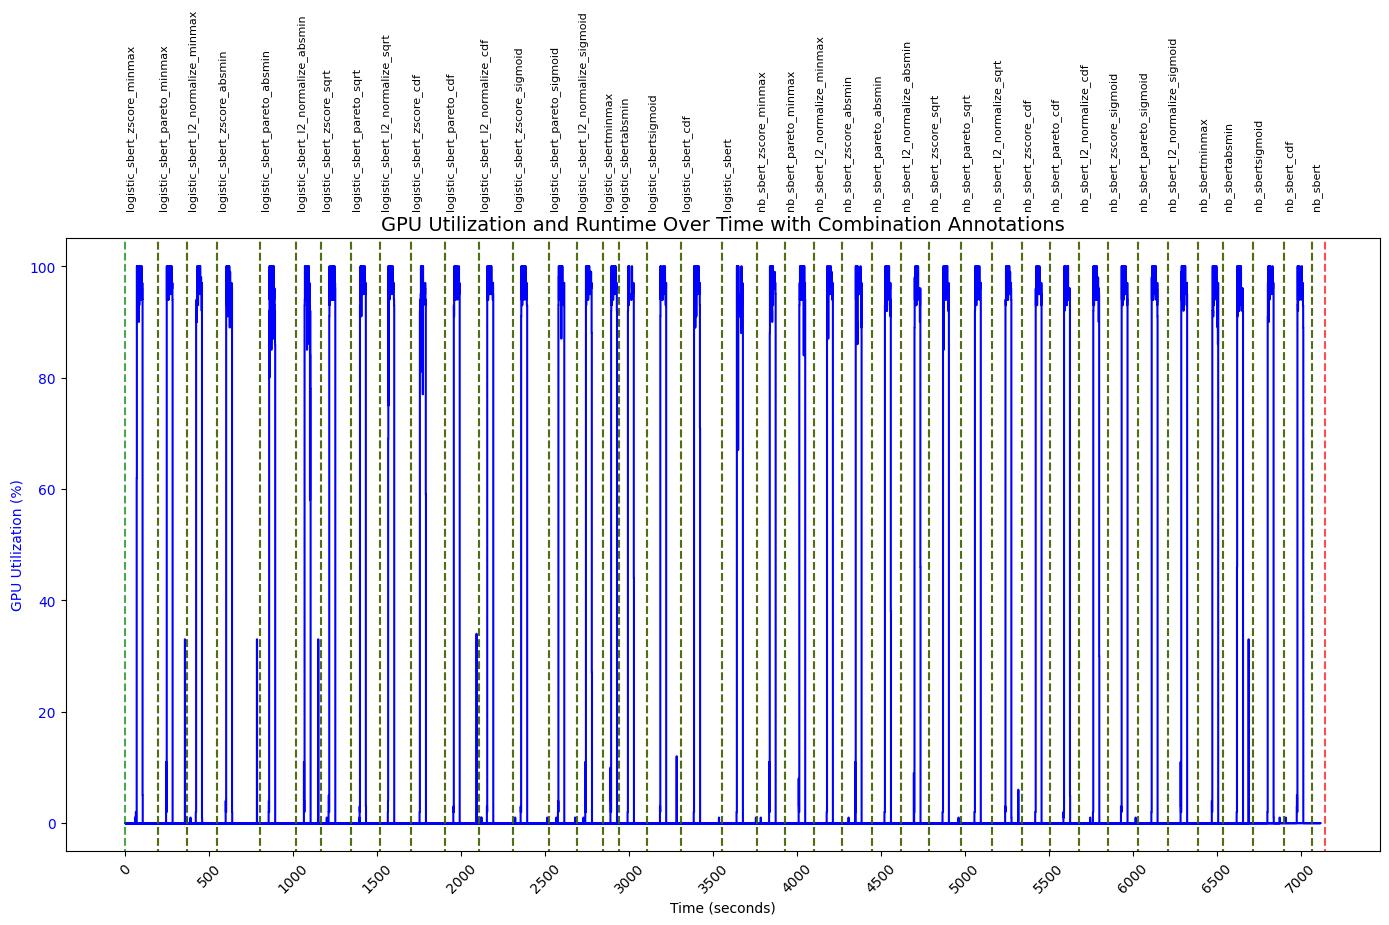

(               Start_Time                End_Time  GPU_Utilization  \
 0 1900-01-01 14:16:16.930 1900-01-01 14:16:18.140                0   
 1 1900-01-01 14:16:18.140 1900-01-01 14:16:19.150                0   
 2 1900-01-01 14:16:19.160 1900-01-01 14:16:20.170                0   
 3 1900-01-01 14:16:20.180 1900-01-01 14:16:21.180                0   
 4 1900-01-01 14:16:21.190 1900-01-01 14:16:22.190                0   
 
    Cumulative_Start_Seconds  Cumulative_End_Seconds  
 0                      0.02                    1.23  
 1                      1.23                    2.24  
 2                      2.25                    3.26  
 3                      3.27                    4.27  
 4                      4.28                    5.28  ,
   Classifier          Feature_Extractor              Start_Time  \
 0   logistic        sbert_zscore_minmax 1900-01-01 14:16:16.910   
 1   logistic        sbert_pareto_minmax 1900-01-01 14:19:29.460   
 2   logistic  sbert_l2_normalize_min

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the log files
gpu_log_path = 'system_metrics.log'
results_log_path = 'results.log'

# Read the log files
with open(gpu_log_path, 'r') as file:
    gpu_log_content = file.read()

with open(results_log_path, 'r') as file:
    results_log_content = file.read()

# Function to parse GPU utilization log
def parse_gpu_log(gpu_log_content):
    gpu_data = []
    lines = gpu_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        try:
            line = lines[i].strip()
            if line.startswith('Time start:'):
                start_time = pd.to_datetime(line.split('Time start:')[1].strip(), format='%H:%M:%S,%f')
            elif line.startswith('utilization.gpu [%]'):
                gpu_util = int(lines[i + 1].strip().replace('%', ''))
                end_time = pd.to_datetime(lines[i + 2].strip().split('Time end:')[1].strip(), format='%H:%M:%S,%f')
                if end_time < start_time:
                    end_time += pd.Timedelta(days=1)
                gpu_data.append((start_time, end_time, gpu_util))
                i += 2  # Skip 'Time end' line
            i += 1
        except (IndexError, ValueError) as e:
            print(f"Error parsing GPU log at line {i}: {e}")
            i += 1
            continue
    return pd.DataFrame(gpu_data, columns=['Start_Time', 'End_Time', 'GPU_Utilization'])

# Function to parse combinations log
def parse_combination_log(combination_log_content):
    comb_data = []
    lines = combination_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        try:
            if lines[i].startswith('Running classifier:'):
                classifier = lines[i].split('classifier:')[1].split('with')[0].strip()
                feature_extractor = lines[i].split('feature extractor:')[1].strip()
                start_time = pd.to_datetime(lines[i + 1].split('Start Time:')[1].strip(), format='%H:%M:%S,%f')
                end_time = pd.to_datetime(lines[i + 4].split('End Time:')[1].strip(), format='%H:%M:%S,%f')
                if end_time < start_time:
                    end_time += pd.Timedelta(days=1)
                runtime = (end_time - start_time).total_seconds()
                comb_data.append((classifier, feature_extractor, start_time, end_time, runtime))
                i += 6
            else:
                i += 1
        except (IndexError, ValueError) as e:
            print(f"Error parsing combination log at line {i}: {e}")
            i += 1
            continue
    return pd.DataFrame(comb_data, columns=['Classifier', 'Feature_Extractor', 'Start_Time', 'End_Time', 'Runtime_Seconds'])

# Parse the logs
gpu_df = parse_gpu_log(gpu_log_content)
comb_df = parse_combination_log(results_log_content)

# Display data for inspection
print(gpu_df.head())
print(comb_df.head())

# Filter out irrelevant or erroneous data points (e.g., extremely high values)
gpu_df = gpu_df[gpu_df['GPU_Utilization'] <= 100]

# Calculate the cumulative runtime for each combination
comb_df['Cumulative_Start_Seconds'] = comb_df['Runtime_Seconds'].cumsum() - comb_df['Runtime_Seconds']
comb_df['Cumulative_End_Seconds'] = comb_df['Runtime_Seconds'].cumsum()

# Calculate GPU utilization seconds based on cumulative runtime
gpu_df['Cumulative_Start_Seconds'] = 0
gpu_df['Cumulative_End_Seconds'] = 0

current_time = 0
for i, row in comb_df.iterrows():
    mask = (gpu_df['Start_Time'] >= row['Start_Time']) & (gpu_df['End_Time'] <= row['End_Time'])
    gpu_df.loc[mask, 'Cumulative_Start_Seconds'] = row['Cumulative_Start_Seconds'] + (gpu_df['Start_Time'][mask] - row['Start_Time']).dt.total_seconds()
    gpu_df.loc[mask, 'Cumulative_End_Seconds'] = row['Cumulative_Start_Seconds'] + (gpu_df['End_Time'][mask] - row['Start_Time']).dt.total_seconds()
    current_time = row['Cumulative_End_Seconds']

# Display updated DataFrame for verification
print(gpu_df.head())
print(comb_df.head())

# Create the Graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot GPU utilization over time as a continuous line
gpu_times = []
gpu_utils = []
for _, row in gpu_df.iterrows():
    gpu_times.extend([row['Cumulative_Start_Seconds'], row['Cumulative_End_Seconds']])
    gpu_utils.extend([row['GPU_Utilization'], row['GPU_Utilization']])

ax1.plot(gpu_times, gpu_utils, color='b')

ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('GPU Utilization (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Annotate the plot with combinations and runtime
for _, row in comb_df.iterrows():
    ax1.axvline(x=row['Cumulative_Start_Seconds'], color='g', linestyle='--', alpha=0.7, ymin=-0.1, ymax=1.1)
    ax1.axvline(x=row['Cumulative_End_Seconds'], color='r', linestyle='--', alpha=0.7, ymin=-0.1, ymax=1.1)
    ax1.text(row['Cumulative_Start_Seconds'], max(gpu_utils) + 10, f"{row['Classifier']}_{row['Feature_Extractor']}", rotation=90, verticalalignment='bottom', fontsize=8, clip_on=False)

# Adding more ticks to the x-axis
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MultipleLocator(500))  # Adjust as needed for more ticks

# Add title and legend
plt.title('GPU Utilization and Runtime Over Time with Combination Annotations', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 1.2])  # Adjust rect to give space for the lifted labels

# Save the plot to a file
fig.savefig("output_graph.png")

# Display the plot
plt.show()

# Display the DataFrames for inspection
gpu_df.head(), comb_df.head()


In [15]:
import pandas as pd
import numpy as np

# Function to parse GPU utilization log
def parse_gpu_log(gpu_log_content):
    gpu_data = []
    lines = gpu_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        try:
            line = lines[i].strip()
            if line.startswith('Time start:'):
                start_time = pd.to_datetime(line.split('Time start:')[1].strip(), format='%H:%M:%S,%f')
            elif line.startswith('utilization.gpu [%]'):
                gpu_util = int(lines[i + 1].strip().replace('%', ''))
                end_time = pd.to_datetime(lines[i + 2].strip().split('Time end:')[1].strip(), format='%H:%M:%S,%f')
                if end_time < start_time:
                    end_time += pd.Timedelta(days=1)
                gpu_data.append((start_time, end_time, gpu_util))
                i += 2  # Skip 'Time end' line
            i += 1
        except (IndexError, ValueError) as e:
            print(f"Error parsing GPU log at line {i}: {e}")
            i += 1
            continue
    return pd.DataFrame(gpu_data, columns=['Start_Time', 'End_Time', 'GPU_Utilization'])

# Function to parse combinations log
def parse_combination_log(combination_log_content):
    comb_data = []
    lines = combination_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        try:
            if lines[i].startswith('Running classifier:'):
                classifier = lines[i].split('classifier:')[1].split('with')[0].strip()
                feature_extractor = lines[i].split('feature extractor:')[1].strip()
                start_time = pd.to_datetime(lines[i + 1].split('Start Time:')[1].strip(), format='%H:%M:%S,%f')
                end_time = pd.to_datetime(lines[i + 4].split('End Time:')[1].strip(), format='%H:%M:%S,%f')
                if end_time < start_time:
                    end_time += pd.Timedelta(days=1)
                runtime = (end_time - start_time).total_seconds()
                comb_data.append((classifier, feature_extractor, start_time, end_time, runtime))
                i += 6
            else:
                i += 1
        except (IndexError, ValueError) as e:
            print(f"Error parsing combination log at line {i}: {e}")
            i += 1
            continue
    return pd.DataFrame(comb_data, columns=['Classifier', 'Feature_Extractor', 'Start_Time', 'End_Time', 'Runtime_Seconds'])

# Parse the logs
gpu_df = parse_gpu_log(gpu_log_content)
comb_df = parse_combination_log(results_log_content)

# Filter out irrelevant or erroneous data points (e.g., extremely high values)
gpu_df = gpu_df[gpu_df['GPU_Utilization'] <= 100]

# Calculate the cumulative runtime for each combination
comb_df['Cumulative_Start_Seconds'] = comb_df['Runtime_Seconds'].cumsum() - comb_df['Runtime_Seconds']
comb_df['Cumulative_End_Seconds'] = comb_df['Runtime_Seconds'].cumsum()

# Calculate GPU utilization seconds based on cumulative runtime
gpu_df['Cumulative_Start_Seconds'] = 0
gpu_df['Cumulative_End_Seconds'] = 0

current_time = 0
for i, row in comb_df.iterrows():
    mask = (gpu_df['Start_Time'] >= row['Start_Time']) & (gpu_df['End_Time'] <= row['End_Time'])
    gpu_df.loc[mask, 'Cumulative_Start_Seconds'] = row['Cumulative_Start_Seconds'] + (gpu_df['Start_Time'][mask] - row['Start_Time']).dt.total_seconds()
    gpu_df.loc[mask, 'Cumulative_End_Seconds'] = row['Cumulative_Start_Seconds'] + (gpu_df['End_Time'][mask] - row['Start_Time']).dt.total_seconds()
    current_time = row['Cumulative_End_Seconds']

# Combine the information into a single table
combined_data = []

for i, row in comb_df.iterrows():
    mask = (gpu_df['Cumulative_Start_Seconds'] >= row['Cumulative_Start_Seconds']) & (gpu_df['Cumulative_End_Seconds'] <= row['Cumulative_End_Seconds'])
    gpu_utilizations = gpu_df.loc[mask, 'GPU_Utilization'].values
    avg_gpu_util = np.mean(gpu_utilizations) if len(gpu_utilizations) > 0 else 0
    combined_data.append({
        'Combination': f"{row['Classifier']} + {row['Feature_Extractor']}",
        'Runtime (seconds)': row['Runtime_Seconds'],
        'Average GPU Utilization (%)': int(avg_gpu_util)  # Format utilization as integer
    })

combined_df = pd.DataFrame(combined_data)

# Save the table as a CSV file
combined_df.to_csv('combined_gpu_utilization.csv', index=False)

Error parsing GPU log at line 49227: list index out of range


C:\Users\Sjard\AppData\Local\Temp\ipykernel_1107152\3675887256.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.0000e-02 6.2000e-01 1.6300e+00 2.6300e+00 3.5400e+00 4.5500e+00
 5.5500e+00 6.5600e+00 7.5800e+00 8.5800e+00 9.5900e+00 1.0600e+01
 1.1600e+01 1.2610e+01 1.3620e+01 1.4630e+01 1.5630e+01 1.6540e+01
 1.7550e+01 1.8560e+01 1.9570e+01 2.0580e+01 2.1580e+01 2.2580e+01
 2.3590e+01 2.4600e+01 2.5620e+01 2.6620e+01 2.7630e+01 2.8640e+01
 2.9550e+01 3.0550e+01 3.1570e+01 3.2580e+01 3.3590e+01 3.4600e+01
 3.5610e+01 3.6620e+01 3.7630e+01 3.8540e+01 3.9550e+01 4.0560e+01
 4.1580e+01 4.2590e+01 4.3600e+01 4.4620e+01 4.5640e+01 4.6550e+01
 4.7560e+01 4.8560e+01 4.9570e+01 5.0580e+01 5.1590e+01 5.2610e+01
 5.3620e+01 5.4640e+01 5.5540e+01 5.6550e+01 5.7560e+01 5.8570e+01
 5.9580e+01 6.0600e+01 6.1610e+01 6.2620e+01 6.3630e+01 6.4540e+01
 6.5560e+01 6.6570e+01 6.7580e+01 6.8590e+01 6.9600e+01 7.0610e+

Error parsing GPU log at line 49227: list index out of range


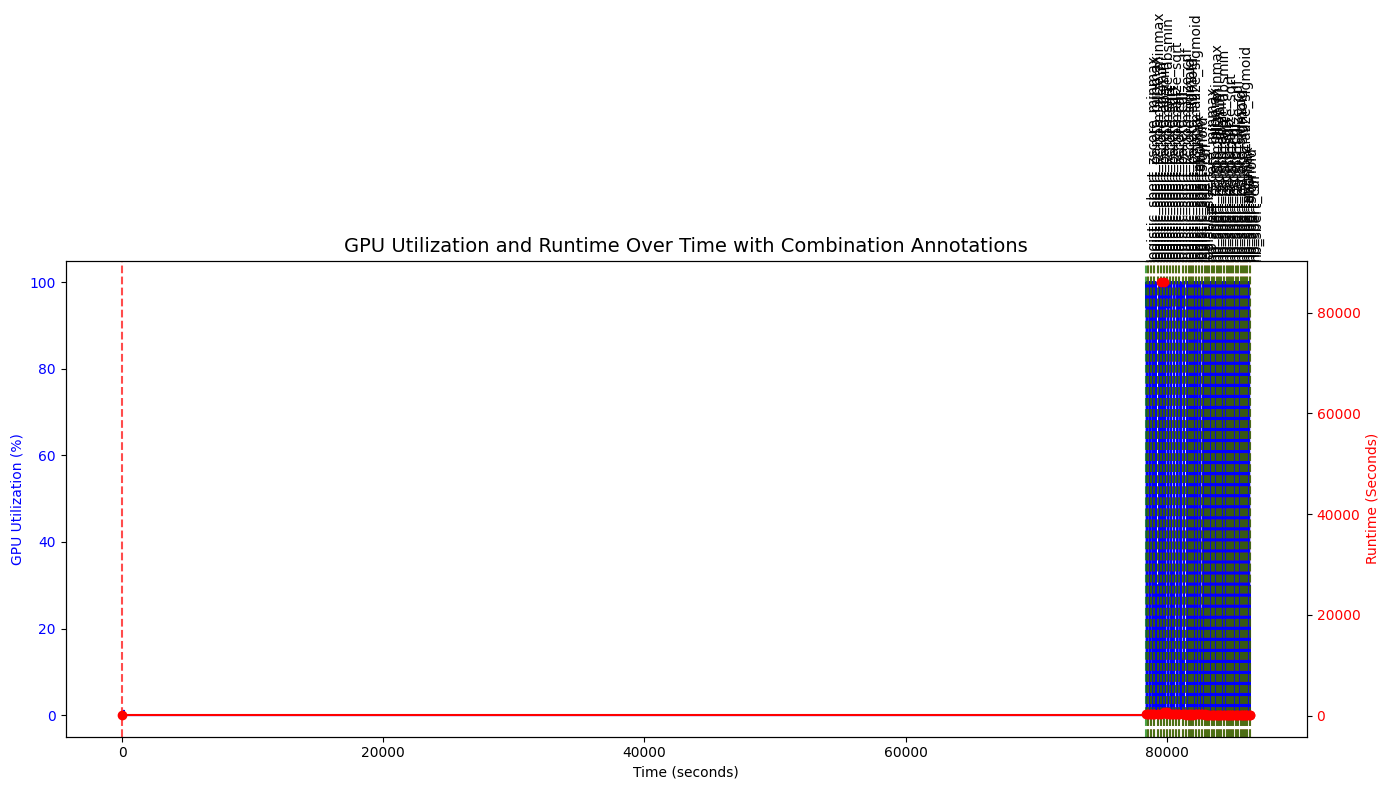

   Classifier           Feature_Extractor              Start_Time  \
0    logistic         sbert_zscore_minmax 1900-01-01 21:46:11.560   
1    logistic         sbert_pareto_minmax 1900-01-01 21:49:43.420   
2    logistic   sbert_l2_normalize_minmax 1900-01-01 21:53:26.130   
3    logistic         sbert_zscore_absmin 1900-01-01 21:57:05.360   
4    logistic         sbert_pareto_absmin 1900-01-01 22:01:51.960   
5    logistic   sbert_l2_normalize_absmin 1900-01-01 22:05:58.330   
6    logistic           sbert_zscore_sqrt 1900-01-01 22:09:15.890   
7    logistic           sbert_pareto_sqrt 1900-01-01 22:13:05.440   
8    logistic     sbert_l2_normalize_sqrt 1900-01-01 22:16:42.690   
9    logistic            sbert_zscore_cdf 1900-01-01 22:20:47.310   
10   logistic            sbert_pareto_cdf 1900-01-01 22:24:57.290   
11   logistic      sbert_l2_normalize_cdf 1900-01-01 22:29:05.830   
12   logistic        sbert_zscore_sigmoid 1900-01-01 22:33:21.310   
13   logistic        sbert_pareto_

In [16]:
import pandas as pd
import numpy as np

# Function to parse GPU utilization log
def parse_gpu_log(gpu_log_content):
    gpu_data = []
    lines = gpu_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        try:
            line = lines[i].strip()
            if line.startswith('Time start:'):
                start_time = pd.to_datetime(line.split('Time start:')[1].strip(), format='%H:%M:%S,%f')
            elif line.startswith('utilization.gpu [%]'):
                gpu_util = int(lines[i + 1].strip().replace('%', ''))
                end_time = pd.to_datetime(lines[i + 2].strip().split('Time end:')[1].strip(), format='%H:%M:%S,%f')
                if end_time < start_time:
                    end_time += pd.Timedelta(days=1)
                gpu_data.append((start_time, end_time, gpu_util))
                i += 2  # Skip 'Time end' line
            i += 1
        except (IndexError, ValueError) as e:
            print(f"Error parsing GPU log at line {i}: {e}")
            i += 1
            continue
    return pd.DataFrame(gpu_data, columns=['Start_Time', 'End_Time', 'GPU_Utilization'])

# Function to parse combinations log
def parse_combination_log(combination_log_content):
    comb_data = []
    lines = combination_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        try:
            if lines[i].startswith('Running classifier:'):
                classifier = lines[i].split('classifier:')[1].split('with')[0].strip()
                feature_extractor = lines[i].split('feature extractor:')[1].strip()
                start_time = pd.to_datetime(lines[i + 1].split('Start Time:')[1].strip(), format='%H:%M:%S,%f')
                end_time = pd.to_datetime(lines[i + 4].split('End Time:')[1].strip(), format='%H:%M:%S,%f')
                if end_time < start_time:
                    end_time += pd.Timedelta(days=1)
                runtime = (end_time - start_time).total_seconds()
                comb_data.append((classifier, feature_extractor, start_time, end_time, runtime))
                i += 6
            else:
                i += 1
        except (IndexError, ValueError) as e:
            print(f"Error parsing combination log at line {i}: {e}")
            i += 1
            continue
    return pd.DataFrame(comb_data, columns=['Classifier', 'Feature_Extractor', 'Start_Time', 'End_Time', 'Runtime_Seconds'])

# Parse the logs
gpu_df = parse_gpu_log(gpu_log_content)
comb_df = parse_combination_log(results_log_content)

# Filter out irrelevant or erroneous data points (e.g., extremely high values)
gpu_df = gpu_df[gpu_df['GPU_Utilization'] <= 100]

# Calculate the cumulative runtime for each combination
comb_df['Cumulative_Start_Seconds'] = comb_df['Runtime_Seconds'].cumsum() - comb_df['Runtime_Seconds']
comb_df['Cumulative_End_Seconds'] = comb_df['Runtime_Seconds'].cumsum()

# Calculate GPU utilization seconds based on cumulative runtime
gpu_df['Cumulative_Start_Seconds'] = 0
gpu_df['Cumulative_End_Seconds'] = 0

current_time = 0
for i, row in comb_df.iterrows():
    mask = (gpu_df['Start_Time'] >= row['Start_Time']) & (gpu_df['End_Time'] <= row['End_Time'])
    gpu_df.loc[mask, 'Cumulative_Start_Seconds'] = row['Cumulative_Start_Seconds'] + (gpu_df['Start_Time'][mask] - row['Start_Time']).dt.total_seconds()
    gpu_df.loc[mask, 'Cumulative_End_Seconds'] = row['Cumulative_Start_Seconds'] + (gpu_df['End_Time'][mask] - row['Start_Time']).dt.total_seconds()
    current_time = row['Cumulative_End_Seconds']

# Combine the information into a single table
combined_data = []

for i, row in comb_df.iterrows():
    mask = (gpu_df['Cumulative_Start_Seconds'] >= row['Cumulative_Start_Seconds']) & (gpu_df['Cumulative_End_Seconds'] <= row['Cumulative_End_Seconds'])
    gpu_utilizations = gpu_df.loc[mask, 'GPU_Utilization'].values
    avg_gpu_util = np.mean(gpu_utilizations) if len(gpu_utilizations) > 0 else 0
    combined_data.append({
        'Combination': f"{row['Classifier']} + {row['Feature_Extractor']}",
        'Runtime (seconds)': row['Runtime_Seconds'],
        'Average GPU Utilization (%)': int(avg_gpu_util)  # Format utilization as integer
    })

combined_df = pd.DataFrame(combined_data)

# Save the table as a CSV file
combined_df.to_csv('combined_gpu_utilization.csv', index=False)

In [ ]:
# Read and display the first few lines of the log file to understand its structure
log_file_path = r'C:\Users\Sjard\OneDrive - Universiteit Utrecht\Thesis\ASReview\Simulation_study_PTSD\Makita\sbert - Copy\system_metrics.log'

try:
    # Open the log file and read lines
    with open(log_file_path, 'r') as file:
        log_lines = file.readlines()
    
    # Display the first few lines of the log file
    for i, line in enumerate(log_lines[:20]):
        print(f"Line {i+1}: {line.strip()}")
except Exception as e:
    print(f"Error reading the log file: {e}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot of Time Taken by Combination
plt.figure(figsize=(12, 6))
sns.boxplot(x='Combination', y='Time Taken (s)', data=timing_df)
plt.title('Box Plot of Time Taken by Combination')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bar Chart of Average Time Taken by Combination
avg_time_df = timing_df.groupby('Combination')['Time Taken (s)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Combination', y='Time Taken (s)', data=avg_time_df)
plt.title('Average Time Taken by Combination')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the results log file
results_log_path = r'C:\Users\Sjard\OneDrive - Universiteit Utrecht\Thesis\ASReview\Simulation_study_PTSD\Makita\sbert - Copy\results.log'
with open(results_log_path, 'r') as file:
    results_log_lines = file.readlines()

# Extract combination, start time, end time, and compute time taken
data = []
combination = None
start_time = None
end_time = None

# Define a mapping for cleaner names
name_mapping = {
    'sbert_zscore_minmax': 'z-score - minmax',
    'sbert_pareto_minmax': 'pareto - minmax',
    'sbert_l2_normalize_minmax': 'l2 normalize - minmax',
    'sbert_zscore_absmin': 'z-score - absmin',
    'sbert_pareto_absmin': 'pareto - absmin',
    'sbert_l2_normalize_absmin': 'l2 normalize - absmin',
    'sbert_zscore_sigmoid': 'z-score - sigmoid',
    'sbert_pareto_sigmoid': 'pareto - sigmoid',
    'sbert_l2_normalize_sigmoid': 'l2 normalize - sigmoid',
    'sbert_zscore_sqrt': 'z-score - sqrt',
    'sbert_pareto_sqrt': 'pareto - sqrt',
    'sbert_l2_normalize_sqrt': 'l2 normalize - sqrt',
    'sbert_zscore_cdf': 'z-score - cdf',
    'sbert_pareto_cdf': 'pareto - cdf',
    'sbert_l2_normalize_cdf': 'l2 normalize - cdf',
    'sbert_sigmoid': 'sigmoid',
    'sbert_cdf': 'cdf',
    'sbert_minmax': 'minmax',
    'sbert_absmin': 'absmin',
    'sbert': 'sbert'
}

# List of all expected combinations
expected_combinations = [
    'logistic - z-score - minmax', 'logistic - pareto - minmax', 'logistic - l2 normalize - minmax', 
    'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - absmin', 
    'logistic - z-score - sigmoid', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid',
    'logistic - z-score - sqrt', 'logistic - pareto - sqrt', 'logistic - l2 normalize - sqrt',
    'logistic - z-score - cdf', 'logistic - pareto - cdf', 'logistic - l2 normalize - cdf', 'logistic - sigmoid', 'logistic - cdf', 
    'logistic - minmax', 'logistic - absmin', 'logistic - sbert', 'nb - z-score - minmax',
    'nb - pareto - minmax', 'nb - l2 normalize - minmax', 'nb - z-score - absmin',
    'nb - pareto - absmin', 'nb - l2 normalize - absmin', 'nb - z-score - sqrt',
    'nb - pareto - sqrt', 'nb - l2 normalize - sqrt', 'nb - z-score - cdf', 
    'nb - pareto - cdf', 'nb - l2 normalize - cdf', 'nb - sigmoid', 'nb - cdf',
    'nb - minmax', 'nb - absmin', 'nb - sbert'
]

for line in results_log_lines:
    if 'Running classifier' in line:
        try:
            combination_raw = line.split('Running classifier: ')[1].strip()
            if ' with feature extractor: ' in combination_raw:
                classifier, feature_extractor = combination_raw.split(' with feature extractor: ')
                classifier = classifier.strip()
                feature_extractor = feature_extractor.strip()
                combination = classifier + ' - ' + name_mapping.get(feature_extractor, feature_extractor)
            else:
                combination = 'unknown'
        except IndexError:
            combination = None
            continue
    elif 'Start Time' in line:
        start_time = line.split('Start Time: ')[1].strip()
    elif 'End Time' in line:
        end_time = line.split('End Time: ')[1].strip()
        if combination and start_time and end_time:
            # Calculate time taken
            time_taken = pd.to_datetime(end_time, format='%H:%M:%S,%f') - pd.to_datetime(start_time, format='%H:%M:%S,%f')
            data.append([combination, time_taken.total_seconds()])
            combination = start_time = end_time = None

# Create DataFrame for the extracted timing data
timing_df = pd.DataFrame(data, columns=['Combination', 'Time Taken (s)'])

# Ensure all expected combinations are in the timing DataFrame
missing_combinations = [comb for comb in expected_combinations if comb not in timing_df['Combination'].values]
missing_df = pd.DataFrame(missing_combinations, columns=['Combination'])
missing_df['Time Taken (s)'] = None

timing_df = pd.concat([timing_df, missing_df], ignore_index=True)

print(f"Timing Data Length: {len(timing_df)}")
print(timing_df.head())



In [ ]:
# Create a DataFrame from the WSS table
wss_data = {
    'Combination': [
        'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - minmax', 
        'logistic - pareto - minmax', 'logistic - z-score - minmax', 'logistic - l2 normalize - sqrt', 
        'naïve bayes - z-score - absmin', 'logistic - pareto - sqrt', 'naïve bayes - pareto - sqrt', 
        'logistic - sigmoid', 'logistic - pareto cdf', 'logistic - z-score cdf', 'logistic - cdf', 
        'logistic - l2 normalize cdf', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid', 
        'logistic - l2 normalize - absmin', 'logistic - z-score - sigmoid', 'naïve bayes - pareto - absmin', 
        'naïve bayes - l2 normalize - minmax', 'naïve bayes - pareto - minmax', 'naïve bayes - z-score - minmax', 
        'naïve bayes - pareto - sigmoid', 'naïve bayes - l2 normalize - sigmoid', 'naïve bayes - sigmoid', 
        'logistic - absmin', 'naïve bayes - absmin', 'naïve bayes - z-score - sigmoid', 
        'logistic - l2 normalize - sqrt', 'logistic - pareto - sqrt', 'naïve bayes - cdf', 
        'naïve bayes - l2 normalize cdf', 'naïve bayes - pareto cdf', 'naïve bayes - z-score cdf', 
        'logistic - z-score - sqrt', 'naïve bayes - l2 normalize - sqrt', 'naïve bayes - l2 normalize - absmin'
    ],
    'WSS (%)': [
        87.5, 87.4, 87.1, 87.1, 87.1, 86.7, 86.4, 85.5, 85.5, 
        85.4, 85.4, 85.4, 85.4, 85.4, 86.0, 85.9, 84.9, 84.9, 84.9, 
        84.8, 84.8, 84.8, 84.7, 84.0, 84.1, 84.3, 84.1, 83.9, 83.8, 
        83.8, 82.4, 82.4, 82.4, 82.4, 82.8, 81.7, 73.8
    ]
}

# Ensure all expected combinations are in the WSS DataFrame
missing_combinations = [comb for comb in expected_combinations if comb not in wss_data['Combination']]
for comb in missing_combinations:
    wss_data['Combination'].append(comb)
    wss_data['WSS (%)'].append(None)

wss_df = pd.DataFrame(wss_data)
print(wss_df.head())


In [ ]:
import pandas as pd

# Create a DataFrame from the WSS table
wss_data = {
    'Combination': [
        'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - minmax', 
        'logistic - pareto - minmax', 'logistic - z-score - minmax', 'logistic - l2 normalize - sqrt', 
        'naïve bayes - z-score - absmin', 'logistic - pareto - sqrt', 'naïve bayes - pareto - sqrt', 
        'logistic - sigmoid', 'logistic - pareto cdf', 'logistic - z-score cdf', 'logistic - cdf', 
        'logistic - l2 normalize cdf', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid', 
        'logistic - l2 normalize - absmin', 'logistic - z-score - sigmoid', 'naïve bayes - pareto - absmin', 
        'naïve bayes - l2 normalize - minmax', 'naïve bayes - pareto - minmax', 'naïve bayes - z-score - minmax', 
        'naïve bayes - pareto - sigmoid', 'naïve bayes - l2 normalize - sigmoid', 'naïve bayes - sigmoid', 
        'logistic - absmin', 'naïve bayes - absmin', 'naïve bayes - z-score - sigmoid', 
        'logistic - l2 normalize - sqrt', 'logistic - pareto - sqrt', 'naïve bayes - cdf', 
        'naïve bayes - l2 normalize cdf', 'naïve bayes - pareto cdf', 'naïve bayes - z-score cdf', 
        'logistic - z-score - sqrt', 'naïve bayes - l2 normalize - sqrt', 'naïve bayes - l2 normalize - absmin'
    ],
    'WSS (%)': [
        87.5, 87.4, 87.1, 87.1, 87.1, 86.7, 86.4, 85.5, 85.5, 
        85.4, 85.4, 85.4, 85.4, 85.4, 86.0, 85.9, 84.9, 84.9, 84.9, 
        84.8, 84.8, 84.8, 84.7, 84.0, 84.1, 84.3, 84.1, 83.9, 83.8, 
        83.8, 82.4, 82.4, 82.4, 82.4, 82.8, 81.7, 73.8
    ]
}

# Verify that both lists are of the same length
assert len(wss_data['Combination']) == len(wss_data['WSS (%)']), "Length of 'Combination' and 'WSS (%)' lists are not equal."

wss_df = pd.DataFrame(wss_data)
print(wss_df.head())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge WSS data with timing data
merged_df = pd.merge(timing_df, wss_df, on='Combination', how='inner')

# Scatter Plot of WSS vs. Time Taken
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time Taken (s)', y='WSS (%)', data=merged_df



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of WSS vs. Time Taken
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time Taken (s)', y='WSS (%)', data=merged_df, hue='Combination')
plt.title('WSS vs. Time Taken')
plt.xlabel('Time Taken (s)')
plt.ylabel('WSS (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Parsing the results.log file
results_log_path = r'C:\Users\Sjard\OneDrive - Universiteit Utrecht\Thesis\ASReview\Simulation_study_PTSD\Makita\sbert - Copy\results.log'
with open(results_log_path, 'r') as file:
    results_log_lines = file.readlines()

data = []
combination = None
start_time = None
end_time = None

name_mapping = {
    'sbert_zscore_minmax': 'z-score - minmax',
    'sbert_pareto_minmax': 'pareto - minmax',
    'sbert_l2_normalize_minmax': 'l2 normalize - minmax',
    'sbert_zscore_absmin': 'z-score - absmin',
    'sbert_pareto_absmin': 'pareto - absmin',
    'sbert_l2_normalize_absmin': 'l2 normalize - absmin',
    'sbert_zscore_sigmoid': 'z-score - sigmoid',
    'sbert_pareto_sigmoid': 'pareto - sigmoid',
    'sbert_l2_normalize_sigmoid': 'l2 normalize - sigmoid',
    'sbert_zscore_sqrt': 'z-score - sqrt',
    'sbert_pareto_sqrt': 'pareto - sqrt',
    'sbert_l2_normalize_sqrt': 'l2 normalize - sqrt',
    'sbert_zscore_cdf': 'z-score - cdf',
    'sbert_pareto_cdf': 'pareto - cdf',
    'sbert_l2_normalize_cdf': 'l2 normalize - cdf',
    'sbert_sigmoid': 'sigmoid',
    'sbert_cdf': 'cdf',
    'sbert_minmax': 'minmax',
    'sbert_absmin': 'absmin',
    'sbert': 'sbert'
}

expected_combinations = [
    'logistic - z-score - minmax', 'logistic - pareto - minmax', 'logistic - l2 normalize - minmax', 
    'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - absmin', 
    'logistic - z-score - sigmoid', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid',
    'logistic - z-score - sqrt', 'logistic - pareto - sqrt', 'logistic - l2 normalize - sqrt',
    'logistic - z-score - cdf', 'logistic - pareto - cdf', 'logistic - l2 normalize - cdf', 'logistic - sigmoid', 'logistic - cdf', 
    'logistic - minmax', 'logistic - absmin', 'logistic - sbert', 'nb - z-score - minmax',
    'nb - pareto - minmax', 'nb - l2 normalize - minmax', 'nb - z-score - absmin',
    'nb - pareto - absmin', 'nb - l2 normalize - absmin', 'nb - z-score - sqrt',
    'nb - pareto - sqrt', 'nb - l2 normalize - sqrt', 'nb - z-score - cdf', 
    'nb - pareto - cdf', 'nb - l2 normalize - cdf', 'nb - sigmoid', 'nb - cdf',
    'nb - minmax', 'nb - absmin', 'nb - sbert'
]

for line in results_log_lines:
    if 'Running classifier' in line:
        try:
            combination_raw = line.split('Running classifier: ')[1].strip()
            if ' with feature extractor: ' in combination_raw:
                classifier, feature_extractor = combination_raw.split(' with feature extractor: ')
                classifier = classifier.strip()
                feature_extractor = feature_extractor.strip()
                combination = classifier + ' - ' + name_mapping.get(feature_extractor, feature_extractor)
            else:
                combination = 'unknown'
        except IndexError:
            combination = None
            continue
    elif 'Start Time' in line:
        start_time = line.split('Start Time: ')[1].strip()
    elif 'End Time' in line:
        end_time = line.split('End Time: ')[1].strip()
        if combination and start_time and end_time:
            time_taken = pd.to_datetime(end_time, format='%H:%M:%S,%f') - pd.to_datetime(start_time, format='%H:%M:%S,%f')
            data.append([combination, time_taken.total_seconds()])
            combination = start_time = end_time = None

timing_df = pd.DataFrame(data, columns=['Combination', 'Time Taken (s)'])

missing_combinations = [comb for comb in expected_combinations if comb not in timing_df['Combination'].values]
missing_df = pd.DataFrame(missing_combinations, columns=['Combination'])
missing_df['Time Taken (s)'] = None

timing_df = pd.concat([timing_df, missing_df], ignore_index=True)

print(f"Timing Data Length: {len(timing_df)}")
print(timing_df.head())


In [ ]:
# Create a DataFrame from the WSS table
wss_data = {
    'Combination': [
        'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - minmax', 
        'logistic - pareto - minmax', 'logistic - z-score - minmax', 'logistic - l2 normalize - sqrt', 
        'naïve bayes - z-score - absmin', 'logistic - pareto - sqrt', 'naïve bayes - pareto - sqrt', 
        'logistic - sigmoid', 'logistic - pareto cdf', 'logistic - z-score cdf', 'logistic - cdf', 
        'logistic - l2 normalize cdf', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid', 
        'logistic - l2 normalize - absmin', 'logistic - z-score - sigmoid', 'naïve bayes - pareto - absmin', 
        'naïve bayes - l2 normalize - minmax', 'naïve bayes - pareto - minmax', 'naïve bayes - z-score - minmax', 
        'naïve bayes - pareto - sigmoid', 'naïve bayes - l2 normalize - sigmoid', 'naïve bayes - sigmoid', 
        'logistic - absmin', 'naïve bayes - absmin', 'naïve bayes - z-score - sigmoid', 
        'logistic - l2 normalize - sqrt', 'logistic - pareto - sqrt', 'naïve bayes - cdf', 
        'naïve bayes - l2 normalize cdf', 'naïve bayes - pareto cdf', 'naïve bayes - z-score cdf', 
        'logistic - z-score - sqrt', 'naïve bayes - l2 normalize - sqrt', 'naïve bayes - l2 normalize - absmin'
    ],
    'WSS (%)': [
        87.5, 87.4, 87.1, 87.1, 87.1, 86.7, 86.4, 85.5, 85.5, 
        85.4, 85.4, 85.4, 85.4, 85.4, 86.0, 85.9, 84.9, 84.9, 84.9, 
        84.8, 84.8, 84.8, 84.7, 84.0, 84.1, 84.3, 84.1, 83.9, 83.8, 
        83.8, 82.4, 82.4, 82.4, 82.4, 82.8, 81.7, 73.8
    ]
}

# Ensure all expected combinations are in the WSS DataFrame
missing_combinations = [comb for comb in expected_combinations if comb not in wss_data['Combination']]
for comb in missing_combinations:
    wss_data['Combination'].append(comb)
    wss_data['WSS (%)'].append(None)

wss_df = pd.DataFrame(wss_data)
print(f"WSS Data Length: {len(wss_df)}")
print(wss_df.head())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merge WSS data with timing data
merged_df = pd.merge(timing_df, wss_df, on='Combination', how='inner')

# Scatter Plot of WSS vs. Time Taken using facet grid
g = sns.FacetGrid(merged_df, col='Combination', col_wrap=5, height=4, aspect=1)
g.map(sns.scatterplot, 'Time Taken (s)', 'WSS (%)')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('WSS vs. Time Taken')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the results log file
results_log_path = r'results.log'
with open(results_log_path, 'r') as file:
    results_log_lines = file.readlines()

data = []
combination = None
start_time = None
end_time = None

name_mapping = {
    'sbert_zscore_minmax': 'z-score - minmax',
    'sbert_pareto_minmax': 'pareto - minmax',
    'sbert_l2_normalize_minmax': 'l2 normalize - minmax',
    'sbert_zscore_absmin': 'z-score - absmin',
    'sbert_pareto_absmin': 'pareto - absmin',
    'sbert_l2_normalize_absmin': 'l2 normalize - absmin',
    'sbert_zscore_sigmoid': 'z-score - sigmoid',
    'sbert_pareto_sigmoid': 'pareto - sigmoid',
    'sbert_l2_normalize_sigmoid': 'l2 normalize - sigmoid',
    'sbert_zscore_sqrt': 'z-score - sqrt',
    'sbert_pareto_sqrt': 'pareto - sqrt',
    'sbert_l2_normalize_sqrt': 'l2 normalize - sqrt',
    'sbert_zscore_cdf': 'z-score - cdf',
    'sbert_pareto_cdf': 'pareto - cdf',
    'sbert_l2_normalize_cdf': 'l2 normalize - cdf',
    'sbert_sigmoid': 'sigmoid',
    'sbert_cdf': 'cdf',
    'sbert_minmax': 'minmax',
    'sbert_absmin': 'absmin',
    'sbert': 'sbert'
}

expected_combinations = [
    'logistic - z-score - minmax', 'logistic - pareto - minmax', 'logistic - l2 normalize - minmax', 
    'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - absmin', 
    'logistic - z-score - sigmoid', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid',
    'logistic - z-score - sqrt', 'logistic - pareto - sqrt', 'logistic - l2 normalize - sqrt',
    'logistic - z-score - cdf', 'logistic - pareto - cdf', 'logistic - l2 normalize - cdf', 'logistic - sigmoid', 'logistic - cdf', 
    'logistic - minmax', 'logistic - absmin', 'logistic - sbert', 'nb - z-score - minmax',
    'nb - pareto - minmax', 'nb - l2 normalize - minmax', 'nb - z-score - absmin',
    'nb - pareto - absmin', 'nb - l2 normalize - absmin', 'nb - z-score - sqrt',
    'nb - pareto - sqrt', 'nb - l2 normalize - sqrt', 'nb - z-score - cdf', 
    'nb - pareto - cdf', 'nb - l2 normalize - cdf', 'nb - sigmoid', 'nb - cdf',
    'nb - minmax', 'nb - absmin', 'nb - sbert'
]

for line in results_log_lines:
    if 'Running classifier' in line:
        try:
            combination_raw = line.split('Running classifier: ')[1].strip()
            if ' with feature extractor: ' in combination_raw:
                classifier, feature_extractor = combination_raw.split(' with feature extractor: ')
                classifier = classifier.strip()
                feature_extractor = feature_extractor.strip()
                combination = classifier + ' - ' + name_mapping.get(feature_extractor, feature_extractor)
            else:
                combination = 'unknown'
        except IndexError:
            combination = None
            continue
    elif 'Start Time' in line:
        start_time = line.split('Start Time: ')[1].strip()
    elif 'End Time' in line:
        end_time = line.split('End Time: ')[1].strip()
        if combination and start_time and end_time:
            time_taken = pd.to_datetime(end_time, format='%H:%M:%S,%f') - pd.to_datetime(start_time, format='%H:%M:%S,%f')
            data.append([combination, time_taken.total_seconds()])
            combination = start_time = end_time = None

timing_df = pd.DataFrame(data, columns=['Combination', 'Time Taken (s)'])

# Ensure all expected combinations are in the timing DataFrame
missing_combinations = [comb for comb in expected_combinations if comb not in timing_df['Combination'].values]
missing_df = pd.DataFrame(missing_combinations, columns=['Combination'])
missing_df['Time Taken (s)'] = None

timing_df = pd.concat([timing_df, missing_df], ignore_index=True)

print(f"Timing Data Length: {len(timing_df)}")
print(timing_df.head())

# Create a DataFrame from the WSS table
wss_data = {
    'Combination': [
        'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - minmax', 
        'logistic - pareto - minmax', 'logistic - z-score - minmax', 'logistic - l2 normalize - sqrt', 
        'naïve bayes - z-score - absmin', 'logistic - pareto - sqrt', 'naïve bayes - pareto - sqrt', 
        'logistic - sigmoid', 'logistic - pareto cdf', 'logistic - z-score cdf', 'logistic - cdf', 
        'logistic - l2 normalize cdf', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid', 
        'logistic - l2 normalize - absmin', 'logistic - z-score - sigmoid', 'naïve bayes - pareto - absmin', 
        'naïve bayes - l2 normalize - minmax', 'naïve bayes - pareto - minmax', 'naïve bayes - z-score - minmax', 
        'naïve bayes - pareto - sigmoid', 'naïve bayes - l2 normalize - sigmoid', 'naïve bayes - sigmoid', 
        'logistic - absmin', 'naïve bayes - absmin', 'naïve bayes - z-score - sigmoid', 
        'logistic - l2 normalize - sqrt', 'logistic - pareto - sqrt', 'naïve bayes - cdf', 
        'naïve bayes - l2 normalize cdf', 'naïve bayes - pareto cdf', 'naïve bayes - z-score cdf', 
        'logistic - z-score - sqrt', 'naïve bayes - l2 normalize - sqrt', 'naïve bayes - l2 normalize - absmin'
    ],
    'WSS (%)': [
        87.5, 87.4, 87.1, 87.1, 87.1, 86.7, 86.4, 85.5, 85.5, 
        85.4, 85.4, 85.4, 85.4, 85.4, 86.0, 85.9, 84.9, 84.9, 84.9, 
        84.8, 84.8, 84.8, 84.7, 84.0, 84.1, 84.3, 84.1, 83.9, 83.8, 
        83.8, 82.4, 82.4, 82.4, 82.4, 82.8, 81.7, 73.8
    ]
}

# Ensure all expected combinations are in the WSS DataFrame
missing_combinations = [comb for comb in expected_combinations if comb not in wss_data['Combination']]
for comb in missing_combinations:
    wss_data['Combination'].append(comb)
    wss_data['WSS (%)'].append(None)

wss_df = pd.DataFrame(wss_data)
print(f"WSS Data Length: {len(wss_df)}")
print(wss_df.head())

# Merge WSS data with timing data
merged_df = pd.merge(timing_df, wss_df, on='Combination', how='inner')

# Print the merged dataframe to check for missing values
print(f"Merged Data Length: {len(merged_df)}")
print(merged_df.head(50))

# Scatter Plot of WSS vs. Time Taken using swarmplot
# Scatter Plot of WSS vs. Time Taken using swarmplot
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Time Taken (s)', y='WSS (%)', data=merged_df, size=8, dodge=True)
plt.title('WSS vs. Time Taken')
plt.xlabel('Time Taken (s)')
plt.ylabel('WSS (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
# Fill missing values with a placeholder
merged_df['Time Taken (s)'].fillna(-1, inplace=True)
merged_df['WSS (%)'].fillna(-1, inplace=True)

# Filter out rows with missing values in either column
filtered_df = merged_df[(merged_df['Time Taken (s)'] != -1) & (merged_df['WSS (%)'] != -1)]

# Print the filtered dataframe to check
print(f"Filtered Data Length: {len(filtered_df)}")
print(filtered_df.head(50))

# Scatter Plot of WSS vs. Time Taken using swarmplot
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Time Taken (s)', y='WSS (%)', data=filtered_df, size=8, dodge=True)
plt.title('WSS vs. Time Taken')
plt.xlabel('Time Taken (s)')
plt.ylabel('WSS (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the timing data from CSV
timing_data_path = r'C:\Users\Sjard\OneDrive - Universiteit Utrecht\Thesis\ASReview\Simulation_study_PTSD\Makita\sbert - Copy\sbert_timing_data.csv'
timing_df = pd.read_csv(timing_data_path)

# Create a DataFrame from the WSS table
wss_data = {
    'Combination': [
        'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - minmax', 
        'logistic - pareto - minmax', 'logistic - z-score - minmax', 'logistic - l2 normalize - sqrt', 
        'naïve bayes - z-score - absmin', 'logistic - pareto - sqrt', 'naïve bayes - pareto - sqrt', 
        'logistic - sigmoid', 'logistic - pareto cdf', 'logistic - z-score cdf', 'logistic - cdf', 
        'logistic - l2 normalize cdf', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid', 
        'logistic - l2 normalize - absmin', 'logistic - z-score - sigmoid', 'naïve bayes - pareto - absmin', 
        'naïve bayes - l2 normalize - minmax', 'naïve bayes - pareto - minmax', 'naïve bayes - z-score - minmax', 
        'naïve bayes - pareto - sigmoid', 'naïve bayes - l2 normalize - sigmoid', 'naïve bayes - sigmoid', 
        'logistic - absmin', 'naïve bayes - absmin', 'naïve bayes - z-score - sigmoid', 
        'logistic - l2 normalize - sqrt', 'logistic - pareto - sqrt', 'naïve bayes - cdf', 
        'naïve bayes - l2 normalize cdf', 'naïve bayes - pareto cdf', 'naïve bayes - z-score cdf', 
        'logistic - z-score - sqrt', 'naïve bayes - l2 normalize - sqrt', 'naïve bayes - l2 normalize - absmin'
    ],
    'WSS (%)': [
        87.5, 87.4, 87.1, 87.1, 87.1, 86.7, 86.4, 85.5, 85.5, 
        85.4, 85.4, 85.4, 85.4, 85.4, 86.0, 85.9, 84.9, 84.9, 84.9, 
        84.8, 84.8, 84.8, 84.7, 84.0, 84.1, 84.3, 84.1, 83.9, 83.8, 
        83.8, 82.4, 82.4, 82.4, 82.4, 82.8, 81.7, 73.8
    ]
}

# Ensure all expected combinations are in the WSS DataFrame
expected_combinations = [
    'logistic - z-score - minmax', 'logistic - pareto - minmax', 'logistic - l2 normalize - minmax', 
    'logistic - z-score - absmin', 'logistic - pareto - absmin', 'logistic - l2 normalize - absmin', 
    'logistic - z-score - sigmoid', 'logistic - pareto - sigmoid', 'logistic - l2 normalize - sigmoid',
    'logistic - z-score - sqrt', 'logistic - pareto - sqrt', 'logistic - l2 normalize - sqrt',
    'logistic - z-score - cdf', 'logistic - pareto - cdf', 'logistic - l2 normalize - cdf', 'logistic - sigmoid', 'logistic - cdf', 
    'logistic - minmax', 'logistic - absmin', 'logistic - sbert', 'nb - z-score - minmax',
    'nb - pareto - minmax', 'nb - l2 normalize - minmax', 'nb - z-score - absmin',
    'nb - pareto - absmin', 'nb - l2 normalize - absmin', 'nb - z-score - sqrt',
    'nb - pareto - sqrt', 'nb - l2 normalize - sqrt', 'nb - z-score - cdf', 
    'nb - pareto - cdf', 'nb - l2 normalize - cdf', 'nb - sigmoid', 'nb - cdf',
    'nb - minmax', 'nb - absmin', 'nb - sbert'
]

missing_combinations = [comb for comb in expected_combinations if comb not in wss_data['Combination']]
for comb in missing_combinations:
    wss_data['Combination'].append(comb)
    wss_data['WSS (%)'].append(None)

wss_df = pd.DataFrame(wss_data)
print(f"WSS Data Length: {len(wss_df)}")
print(wss_df.head())

# Merge WSS data with timing data
merged_df = pd.merge(timing_df, wss_df, on='Combination', how='inner')

# Print the merged dataframe to check for missing values
print(f"Merged Data Length: {len(merged_df)}")
print(merged_df.head(50))

# Scatter Plot of WSS vs. Time Taken using swarmplot
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Time Taken (s)', y='WSS (%)', data=merged_df, size=8, dodge=True)
plt.title('WSS vs. Time Taken')
plt.xlabel('Time Taken (s)')
plt.ylabel('WSS (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print(merged_df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to parse GPU utilization log
def parse_gpu_log(gpu_log_content):
    gpu_data = []
    lines = gpu_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line.startswith('Time start:'):
            start_time = pd.to_datetime(line.split('Time start:')[1].strip(), format='%H:%M:%S,%f')
        elif line.startswith('utilization.gpu [%]'):
            gpu_util = int(lines[i + 1].strip().replace('%', ''))
            i += 2  # Skip 'Time end' line
            end_time = pd.to_datetime(lines[i].strip().split('Time end:')[1].strip(), format='%H:%M:%S,%f')
            gpu_data.append((start_time, end_time, gpu_util))
        i += 1
    return pd.DataFrame(gpu_data, columns=['Start_Time', 'End_Time', 'GPU_Utilization'])

# Function to parse combinations log
def parse_combination_log(combination_log_content):
    comb_data = []
    lines = combination_log_content.strip().split('\n')
    i = 0
    while i < len(lines):
        if lines[i].startswith('Running classifier:'):
            classifier = lines[i].split('classifier:')[1].split('with')[0].strip()
            feature_extractor = lines[i].split('feature extractor:')[1].strip()
            start_time = pd.to_datetime(lines[i + 1].split('Start Time:')[1].strip(), format='%H:%M:%S,%f')
            runtime = int(lines[i + 2].split(': ')[1].split()[0])
            end_time = pd.to_datetime(lines[i + 4].split('End Time:')[1].strip(), format='%H:%M:%S,%f')
            comb_data.append((classifier, feature_extractor, start_time, end_time, runtime))
            i += 6
        else:
            i += 1
    return pd.DataFrame(comb_data, columns=['Classifier', 'Feature_Extractor', 'Start_Time', 'End_Time', 'Runtime_Seconds'])

# Example log content
gpu_log_content = """
Time start:  21:35:46,00 
utilization.memory [%]
0 %
utilization.gpu [%]
0 %
Time end:  21:35:47,11 
Time start:  21:35:47,12 
utilization.memory [%]
0 %
utilization.gpu [%]
0 %
Time end:  21:35:48,14 
Time start:  21:35:48,14 
utilization.memory [%]
0 %
utilization.gpu [%]
0 %
"""

combination_log_content = """
Running classifier: logistic with feature extractor: sbert_zscore_minmax 
Start Time: 21:36:37,72 
Runtime for classifier logistic with feature extractor sbert_zscore_minmax: 206 seconds 
Start Total Centiseconds: 7779772, End Total Centiseconds: 7800466, Difference in Seconds: 206 
End Time: 21:40:04,66 
############## The whole computation took 206 SECONDS or 3 MINUTES ###################### 
Running classifier: logistic with feature extractor: sbert_pareto_minmax 
Start Time: 21:40:04,68 
"""

# Parse the logs
gpu_df = parse_gpu_log(gpu_log_content)
comb_df = parse_combination_log(combination_log_content)

# Create the Graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot GPU utilization over time
for _, row in gpu_df.iterrows():
    ax1.plot([row['Start_Time'], row['End_Time']], [row['GPU_Utilization'], row['GPU_Utilization']], color='b')

ax1.set_xlabel('Time')
ax1.set_ylabel('GPU Utilization (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot runtime as a line plot with a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (Seconds)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Annotate the plot with combinations and runtime
for _, row in comb_df.iterrows():
    ax1.axvline(x=row['Start_Time'], color='g', linestyle='--', alpha=0.7)
    ax1.axvline(x=row['End_Time'], color='r', linestyle='--', alpha=0.7)
    ax1.text(row['Start_Time'], max(gpu_df['GPU_Utilization']), f"{row['Classifier']}_{row['Feature_Extractor']}", rotation=90, verticalalignment='bottom')
    ax2.plot([row['Start_Time'], row['End_Time']], [row['Runtime_Seconds'], row['Runtime_Seconds']], color='r', marker='o')

# Format x-axis for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Add title and legend
plt.title('GPU Utilization and Runtime Over Time with Combination Annotations')
fig.tight_layout()
plt.show()

# Display the Table
print(comb_df)
